# OBI: Visualization
> Ignorance is strength

In [ ]:
# hide
import blackhc.project.script

Appended /home/blackhc/PycharmProjects/bald-ical/src to paths
Switched to directory /home/blackhc/PycharmProjects/bald-ical
%load_ext autoreload
%autoreload 2


In [ ]:
import collections
import functools
import math
import os
import re
from collections import namedtuple
from dataclasses import dataclass
from typing import NamedTuple

import laaos
import pandas as pd
import seaborn as sns
import torch
import wandb

In [ ]:
import operator
import functools

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
mpl.rcParams["figure.dpi"] = 150
sns.set_style("whitegrid")

In [ ]:
def savefig(g, path):
    g.savefig(path, transparent=True, dpi=300, bbox_inches="tight", pad_indices=0)

In [ ]:
c = sns.color_palette()
c

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# Import WandB data

In [ ]:
api = wandb.Api()
#run = api.run("oatml-andreas-kirsch/balds/runs/tgikwfn1")
run = api.run("oatml-andreas-kirsch/balds/runs/1zovclmd")

In [ ]:
history = run.history()

In [ ]:
obi_performances = sum(history.obi_performances, start=[])

In [ ]:
df = pd.DataFrame.from_records(obi_performances)
df

,trial_index,Dataclass,accuracy,crossentropy,num_samples,online_training_set_size,real_training_set_size,total_training_set_size
0,0,batchbald_redux.online_bayesian_inference.OBIP...,0.6092,2.379301,100,20,20,20
1,1,batchbald_redux.online_bayesian_inference.OBIP...,0.6164,2.158651,100,20,20,20
2,2,batchbald_redux.online_bayesian_inference.OBIP...,0.6047,2.774381,100,20,20,20
3,3,batchbald_redux.online_bayesian_inference.OBIP...,0.6098,2.529290,100,20,20,20
4,4,batchbald_redux.online_bayesian_inference.OBIP...,0.5854,2.653058,100,20,20,20
...,...,...,...,...,...,...,...,...
2575,0,batchbald_redux.online_bayesian_inference.OBIP...,0.9362,0.216835,10000,100,100,100
2576,1,batchbald_redux.online_bayesian_inference.OBIP...,0.9348,0.221370,10000,100,100,100
2577,2,batchbald_redux.online_bayesian_inference.OBIP...,0.9305,0.230654,10000,100,100,100
2578,3,batchbald_redux.online_bayesian_inference.OBIP...,0.9317,0.229013,10000,100,100,100


In [ ]:
df["obi_steps"] = df.online_training_set_size - df.real_training_set_size

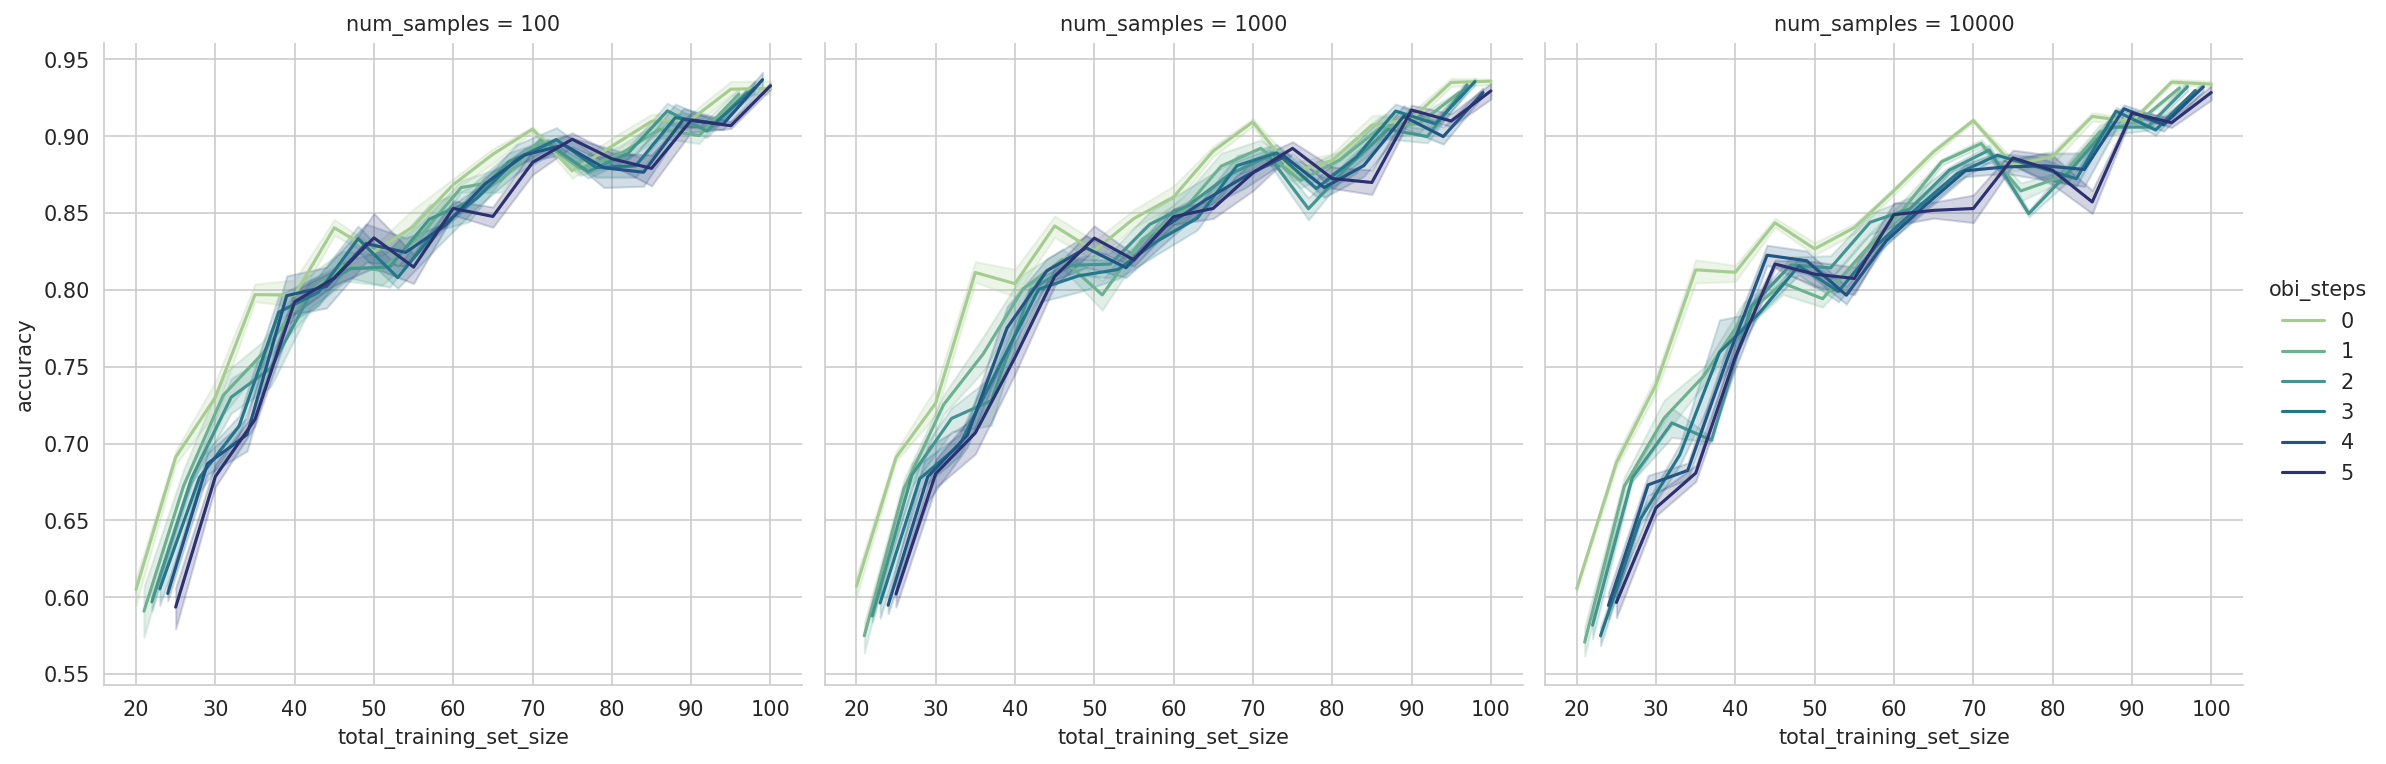

In [ ]:
sub_df = df[df.obi_steps <= 5]
sns.relplot(data=sub_df, x="total_training_set_size", y="accuracy", col="num_samples", hue="obi_steps", palette=sns.color_palette("crest", as_cmap=True), kind="line")

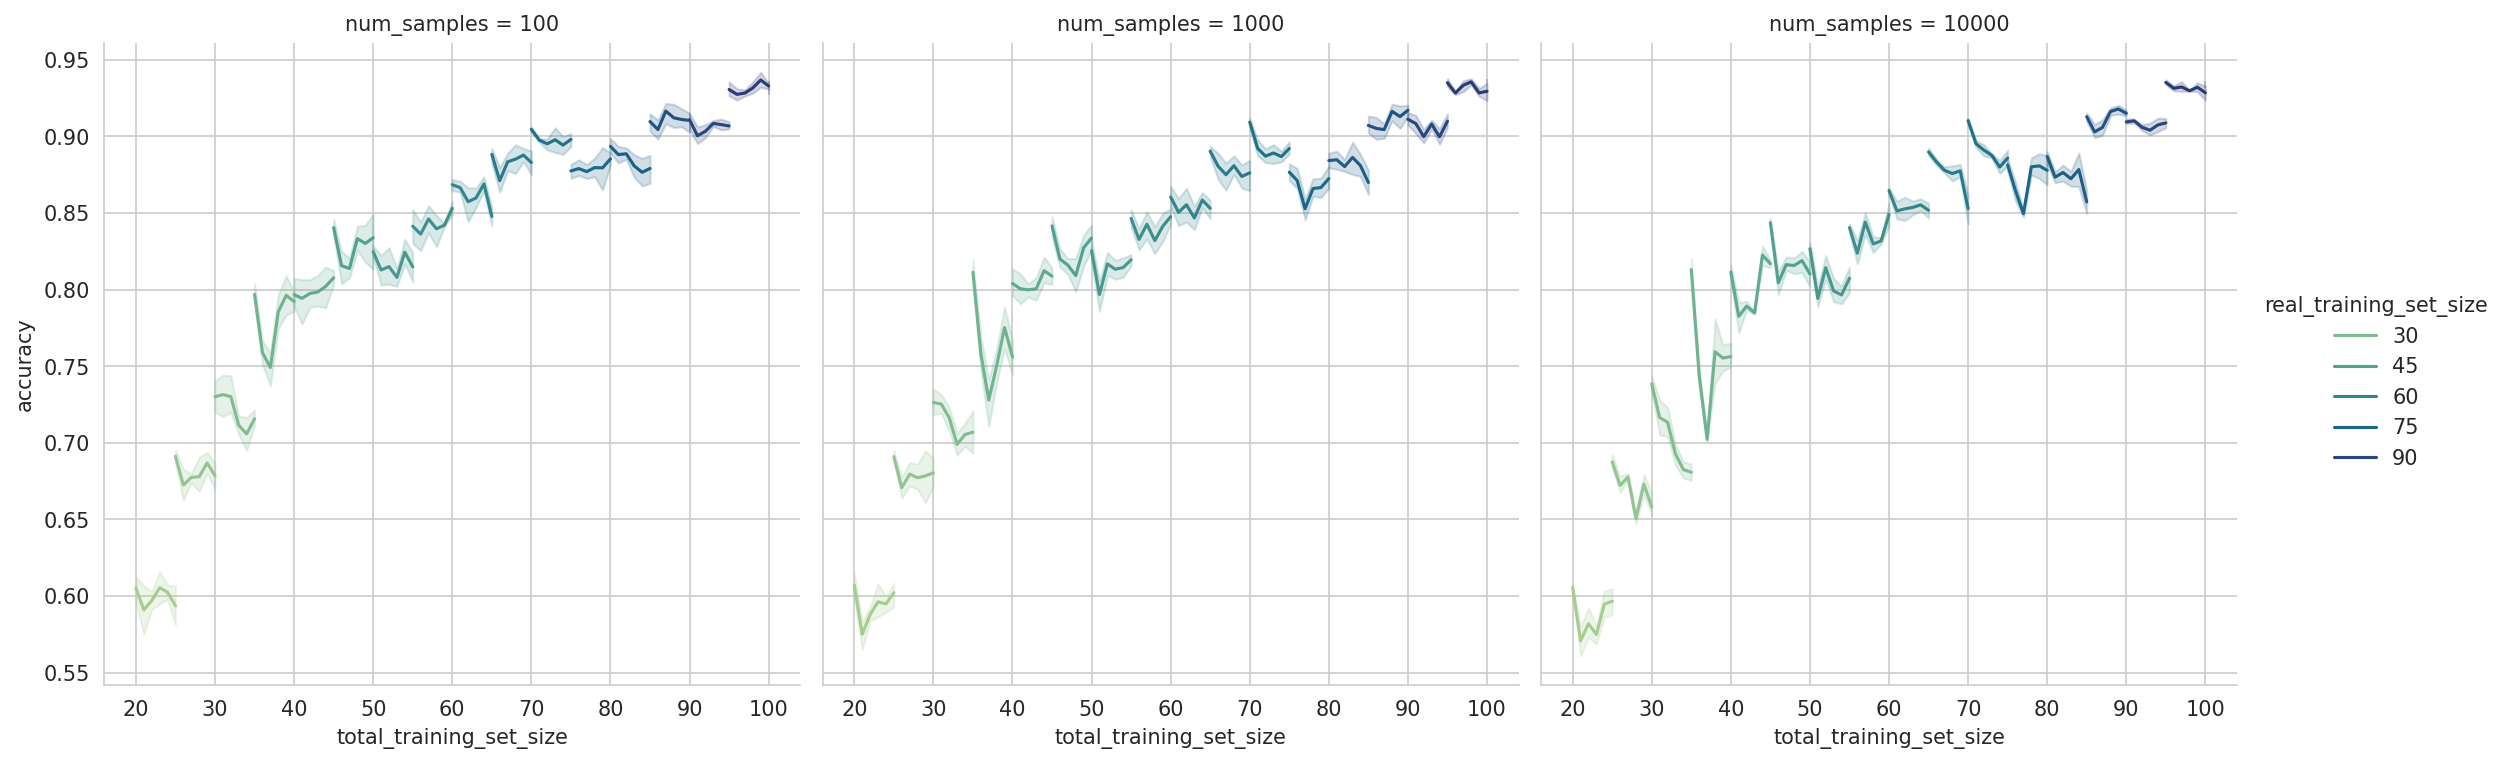

In [ ]:
sub_df = df[df.obi_steps <= 5]
sns.relplot(data=sub_df, x="total_training_set_size", y="accuracy", col="num_samples", hue="real_training_set_size", palette=sns.color_palette("crest", as_cmap=True), kind="line")